## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster import AffinityPropagation
#from sklearn.cluster import SpectralClustering
#from sklearn.cluster import DBSCAN
#from sklearn.cluster import  OPTICS
#from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans

from sklearn.datasets import load_sample_image

## k-Means

k-Means supoẽ que:

- O "centro do cluster" é a média aritmética de todos os pontos pertencentes ao cluster.

- Cada ponto está mais próximo de seu próprio centro de cluster do que de outros centros de cluster.

Vamos dar uma olhada em um conjunto de dados simples e ver o resultado de *k*-means.


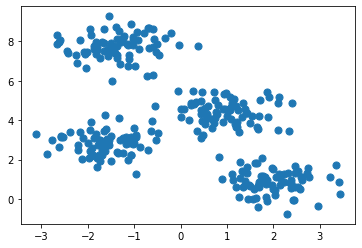

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

Olhando é relativamente fácil identificar os quatro grupos.

O algoritmo *k*-means faz isso automaticamente:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=1, init='random', random_state=0  )

kmeans.fit(X)

y_kmeans = kmeans.predict(X)

Vamos visualizar os resultados plotando os dados coloridos por grupo junto com os centroids:

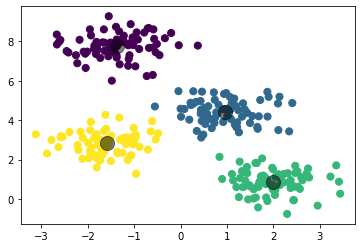

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Para econtrar os clusters o k-means utiliza um algoritmo conhecido como **Expectation–Maximization**.

## k-Means Algorithm: Expectation–Maximization

K-means utiliza uma abordagem iterativa intuitiva conhecida como Expectation-Maximization (E-M) e consiste no seguinte procedimento:

Inicializar aleatoriamente os k-centróides e repetir até convergir:

1. E-Step: atribuir pontos do dataset ao centróide mais próximo para formar os clusters; e

2. M-Step: redefinir os centróides do cluster para usando a média dos pontos do grupo.

### Problemas

#### O ótimo global não é garantido. 

Por exemplo, se iniciarmos com outra semente aleatória poderiamos acabar com:

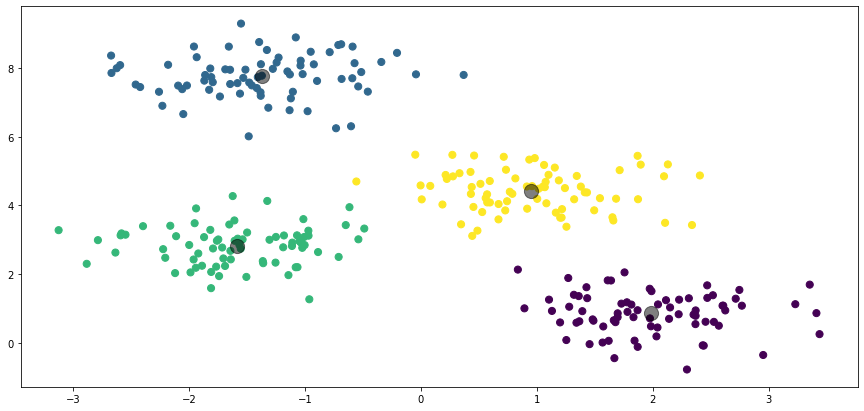

In [ ]:
kmeans = KMeans(n_clusters=4, init='random', n_init=10, random_state=5 )

y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(15,7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

A abordagem E-M convergiu, mas não convergiu para um ótimo global. Por esse motivo, é comum que o algoritmo seja executado várias vezes com diferentes inicializações, de fato o Scikit-Learn o faz por padrão (definido pelo parâmetro ``n_init=10``).

A métrica de qualidade é minimizar a soma de das distâncias de todos os membrois do cluster:

$L = \displaystyle \sum_{i=0}^n \underset{\mu_j \in C }{\min} \Big(||x_i - \mu_j||^2 \Big)$ 

conhecida como inercia. 

#### O número de clusters deve ser escolhido de antemão

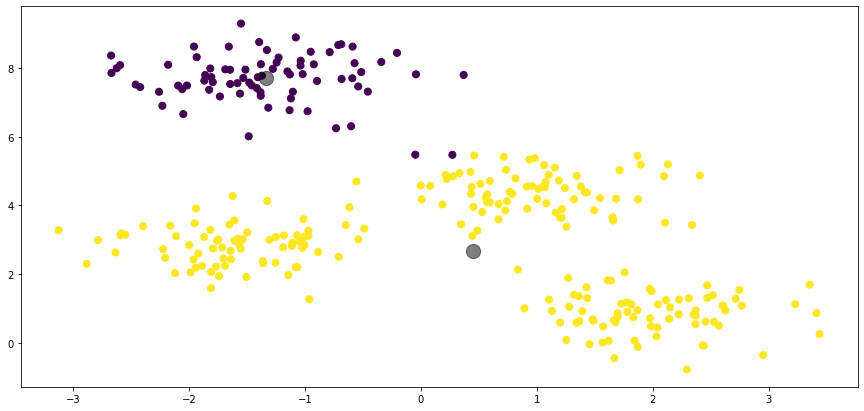

In [ ]:
kmeans = KMeans(n_clusters=2 , init='random', n_init=1, random_state=0)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)
plt.figure(figsize=(15,7))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Se o resultado é representativo ou não é uma questão difícil de responder. Para isso podemos observar o Silhouette.

#### o limite entre os clusters é linear

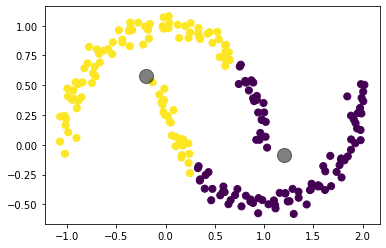

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=5)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Silhouette

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.4937501425805638
For n_clusters = 7 The average silhouette_score is : 0.4082730152550139


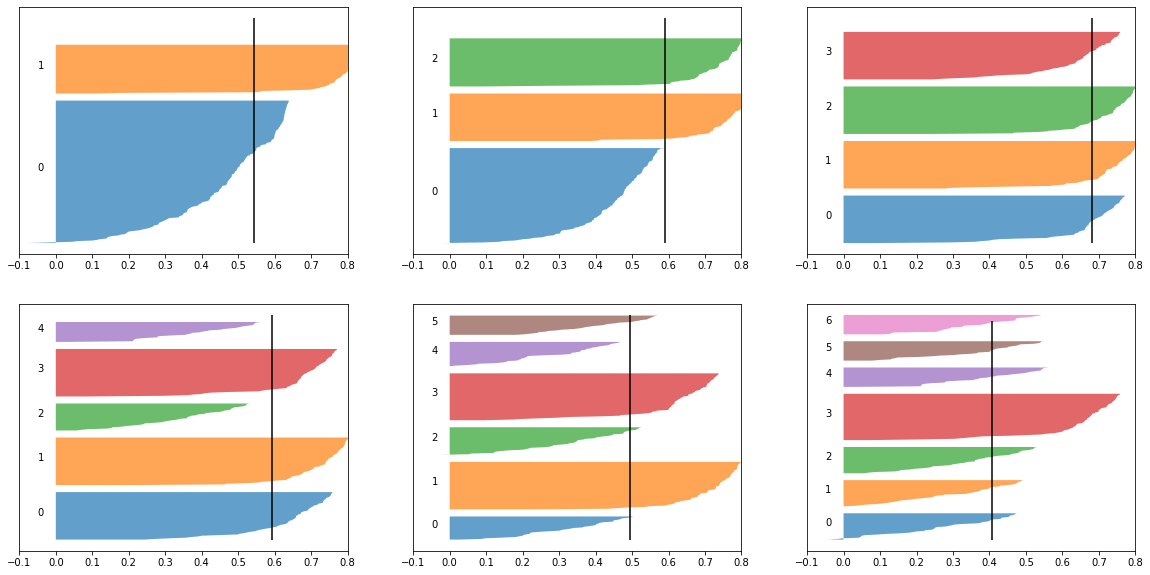

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

range_n_clusters = [2, 3, 4, 5, 6, 7] # k 

plt.figure(figsize=(20,10))

for j, n_clusters in enumerate(range_n_clusters):

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    plt.subplot(2,3, j+1)
    plt.vlines(silhouette_avg , 0, len(sample_silhouette_values)+50)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        plt.xlim([-0.1, 0.8])
        plt.yticks([])
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


plt.show()

### Método Elbow 

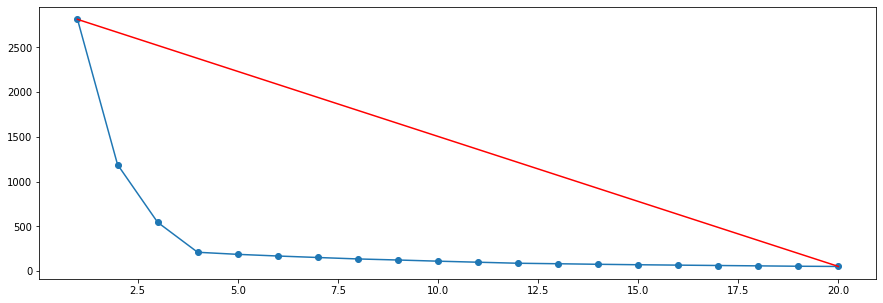

In [ ]:
def calculate_wcss(data, min_k, max_k):
    wcss = []
    for n in range(min_k, max_k):
        kmeans = KMeans(n_clusters=n, random_state=1)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

min_k = 1
max_k = 21
wcss = calculate_wcss(X, min_k=min_k, max_k=max_k)

plt.figure(figsize=(15,5))
plt.plot(range(min_k, len(wcss)+1), wcss, 'o-')
plt.plot([min_k, len(wcss)], [wcss[0], wcss[-1]], 'r')
plt.show()

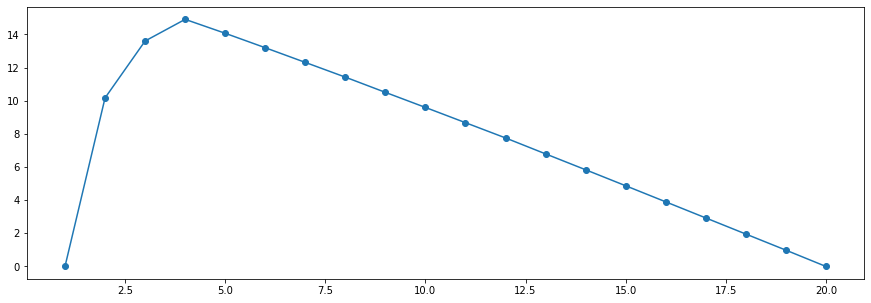

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = len(wcss), wcss[-1]

    distances = []
    for i in range(1, len(wcss)+1):
        x0 = i
        y0 = wcss[i-1]
        numerator = np.abs((y2 - y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1 )
        denominator = np.sqrt( (y2 - y1)**2 + (x2-x1)**2)
        distances.append(numerator/denominator)
    
    return distances

distances = optimal_number_of_clusters(wcss)

plt.figure(figsize=(15,5))
plt.plot(range(min_k, len(wcss)+1), distances, 'o-')
plt.show()

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

X, y = make_moons(200, noise=.05, random_state=0)

model = #

labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Vemos que, com essa abordagem de transformação do kernel, o *k*-means é capaz de encontrar limites não lineares mais complicados entre os clusters.

## Examples

Being careful about these limitations of the algorithm, we can use *k*-means to our advantage in a wide variety of situations.
We'll now take a look at a couple examples.

### Example 1: k-means on digits

Tentaremos usar k-means identificar dígitos (8x8 pixels) semelhantes sem usar as informações do rótulo original

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

kmeans = KMeans(n_clusters=10, random_state=0)

clusters = kmeans.fit_predict(digits.data )

print(kmeans.cluster_centers_.shape)

(1797, 64)
(10, 64)


O resultado são 10 centróides em 64 dimensões.

Observe que os centróides são pontos de 64 dimensões e podem ser interpretados como o dígito "típico" dentro do cluster.

Vamos ver como eles são:

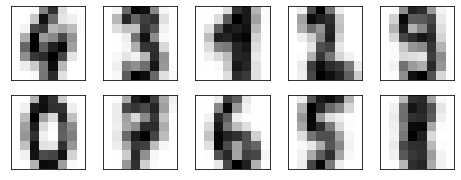

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que *mesmo sem os rótulos*, `` KMeans`` é capaz de encontrar clusters cujos centros são dígitos reconhecíveis, talvez com exceção do 1 e 8.

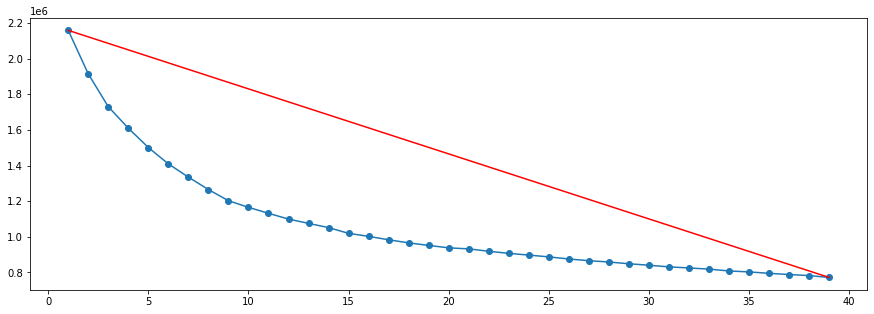

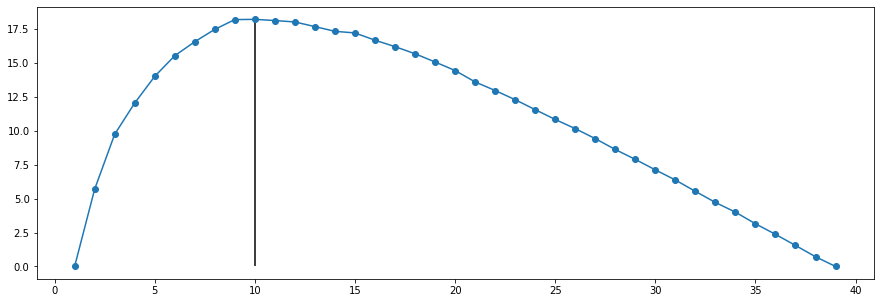

Number of clusters:  10


In [ ]:
min_k = 1
max_k = 40
wcss = calculate_wcss(digits.data, min_k=min_k, max_k=max_k)

plt.figure(figsize=(15,5))
plt.plot(range(min_k, len(wcss)+min_k), wcss, 'o-')
plt.plot([min_k, len(wcss)], [wcss[0], wcss[-1]], 'r')
plt.show()

distances = optimal_number_of_clusters(wcss)

plt.figure(figsize=(15,5))
plt.plot(range(min_k, len(wcss)+min_k), distances, 'o-')
plt.vlines(np.argmax(distances) + min_k, 0, np.max(distances))
plt.show()

print("Number of clusters: ", np.argmax(distances) + min_k)

O k-means não tem informação dos rótulos, portanto os rótulos gerados para cada grupo de digitos não são ordenados.

Podemos aproveitar os rótulos verdadeiros do dataser para avaliar qual é a maior de dígitos de cada classe em cada grupo e calcular alguna métrica.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # moda

Agora podemos verificar a precisão do nosso agrupamento não supervisionado em encontrar dígitos semelhantes nos dados:

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7952142459654981

Com apenas o algoritmo simples *k*-means, descobrimos o agrupamento correto para 80% dos dígitos de entrada!

Vamos verificar a matriz de confusão para isso:

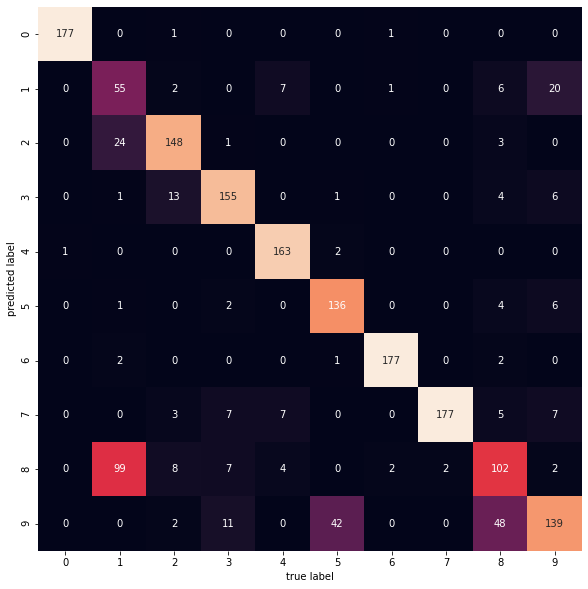

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Como podemos esperar dos centros do cluster que visualizamos antes, o principal ponto de confusão é entre oitos e um.

Isso mostra que podemos essencialmente construir um classificador de dígitos *sem referência a quaisquer rótulos conhecidos*!

### Exemplo 2: *k*-means para compressão de cores

Uma aplicação interessante de agrupamento é a compactação de cores em imagens.

Por exemplo, imagine que você tem uma imagem com milhões de cores.

Na maioria das imagens, um grande número de cores não será perceptível porque muitos dos pixels da imagem terão cores semelhantes ou até idênticas.


Por exemplo, considere a imagem mostrada na figura a seguir, que é do módulo Scikit-Learn ``datasets``:

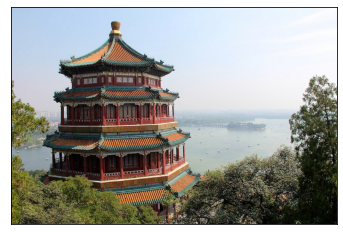

In [120]:
china = load_sample_image("china.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

A imagem em si é armazenada em uma matriz tridimensional de tamanho ``(altura, largura, RGB)``, contendo contribuições vermelho / azul / verde como números inteiros de 0 a 255:

In [121]:
china.shape

(427, 640, 3)

Uma maneira de ver esse conjunto de pixels é como uma nuvem de pontos em um espaço de cores tridimensional.

In [122]:
data = china/255. # normalizando os pixels entre 0 e 1
data = data.reshape(427*640,3)
data.shape

(273280, 3)

Visualizando a distribuição de pixels pela cor:


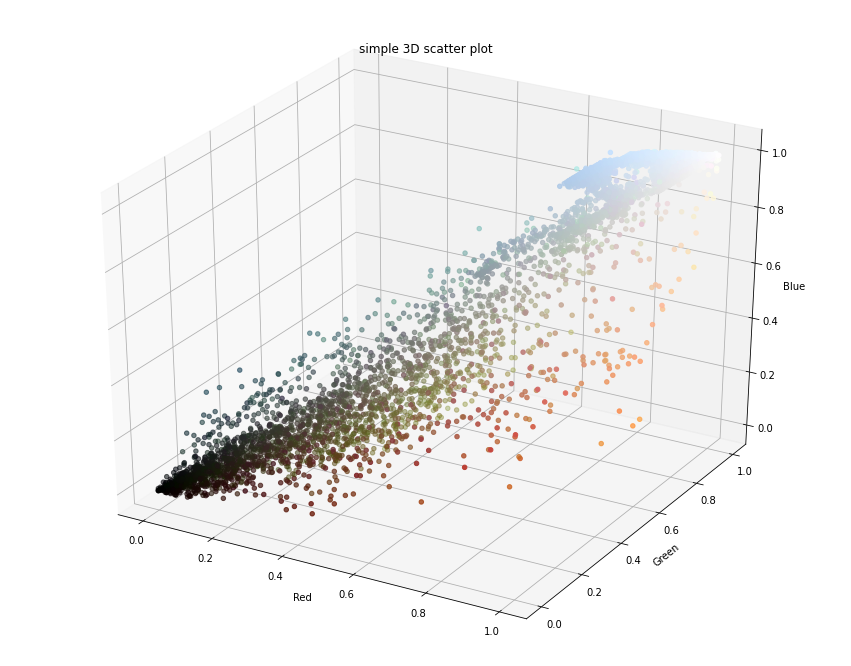

In [123]:
N = 5000 # quantidade de pixels escolhidos aleatoriamente

rng = np.random.RandomState(0)
i = rng.permutation(data.shape[0])[:N]

fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
ax.scatter3D(data[i,0],data[i,1],data[i,2], color = data[i])
plt.title("simple 3D scatter plot")
ax.set(xlabel='Red', ylabel='Green', zlabel='Blue' )
plt.show()

Agora vamos reduzir esses 16 milhões de cores para apenas 16 cores, usando os centróides do *k*-means.

In [124]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
centroids = kmeans.cluster_centers_

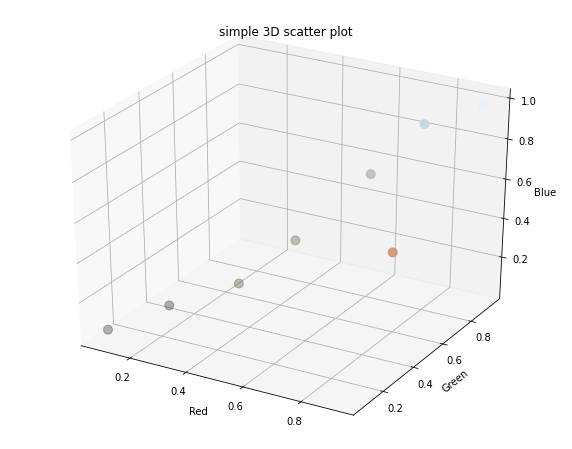

In [125]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(centroids[:,0], centroids[:,1], centroids[:,2], color=centroids, s=80)
plt.title("simple 3D scatter plot")
ax.set(xlabel='Red', ylabel='Green', zlabel='Blue' )
plt.show()

O resultado é uma nova coloração dos pixels originais, onde cada pixel recebe a cor do centro do cluster mais próximo.

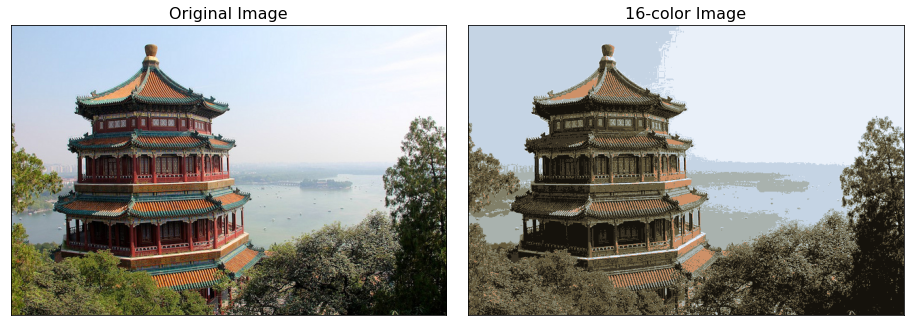

In [126]:
new_colors = centroids[kmeans.predict(data)]

china_recolored = new_colors.reshape(427,640,3)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Alguns detalhes certamente são perdidos na imagem à direita, mas a imagem geral ainda é facilmente reconhecível.

Esta imagem à direita atinge um fator de compressão de cerca de 1 milhão!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


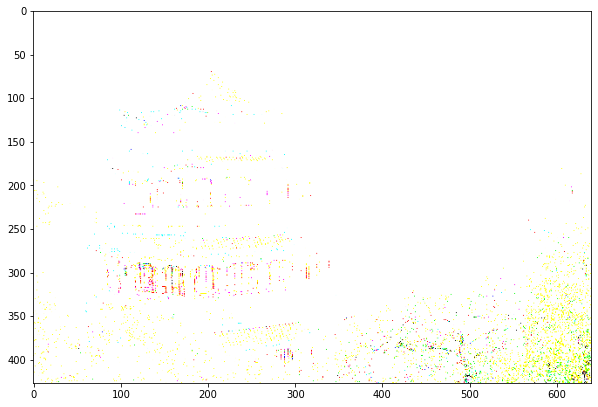

In [127]:
plt.figure(figsize = (10, 8))
plt.imshow(china - china_recolored);

In [128]:
data.shape

(273280, 3)

##Atividade 1 - Aula 3

**Descrição da Atividade:**

* Repetir a atividade de compressão de cores da imagem mas utilizando qualquer algoritmo de cluster do
sklearn (https://scikit-learn.org/stable/modules/clustering.html).

* A escolha do algoritmo deve ser sábia, ou seja, antes de escolher o algoritmo ver algum critério do
funcionamento que seja interessante para o problema da imagem.

* Gerar as imagens com a diferença dos pixels entre a imagem original e a nova compressão, e entre a
nova compressão e o kMeans.

* Discutir qual método é melhor e o por que.

In [3]:
china_2 = load_sample_image("china.jpg")

In [4]:
china_2.shape

(427, 640, 3)

In [5]:
data_2 = china_2/255. # normalizando os pixels entre 0 e 1
data_2 = data_2.reshape(427*640,3)
data_2.shape

(273280, 3)

A escolha da classe de clusterização foi feita levando em conta o custo computacional. As classes a seguir utilizaram todo o recurso disponível de RAM no Colab: AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN, OPTICS e GaussianMixture.

Em adição, o MiniBatchKMeans é uma variante do KMeans. Seu principal propósito é fazer o que o KMeans faz, porém, com menor tempo computacional. Isso ocasiona em qualidade reduzida nos resultados obtidos se comparado ao KMeans. 

In [129]:
#model = Birch(n_clusters = 24, threshold=0.2, copy=False).fit(data_2)
model = MiniBatchKMeans(n_clusters=8).fit(data_2)

Apesar de ter sido verificado que, quando `n_clusters=64`, a imagem gerada fica mais nítida e com coloração mais próxima do original, foi definido `n_clusters=8` para fim de comparação entre modelos. 

In [130]:
model

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [131]:
#Para o Birch
#centroids_2 = model.subcluster_centers_

#Para o MiniBatchKMeans
centroids_2 = model.cluster_centers_

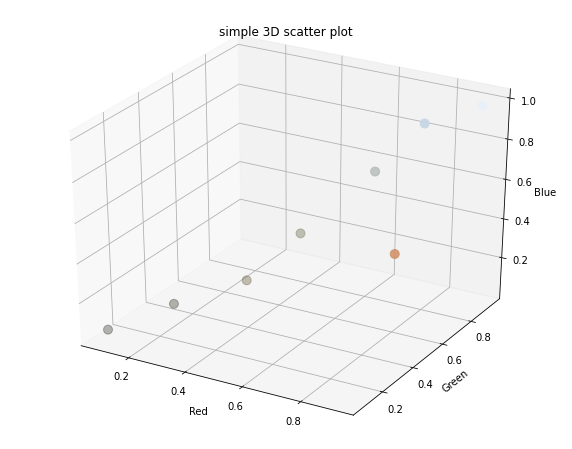

In [132]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(centroids_2[:,0], centroids_2[:,1], centroids_2[:,2], color=centroids_2, s=80)
plt.title("simple 3D scatter plot")
ax.set(xlabel='Red', ylabel='Green', zlabel='Blue' )
plt.show()

A seguir, podemos verificar as diferenças entre a imagem original e a gerada com o MiniBatchKMeans:

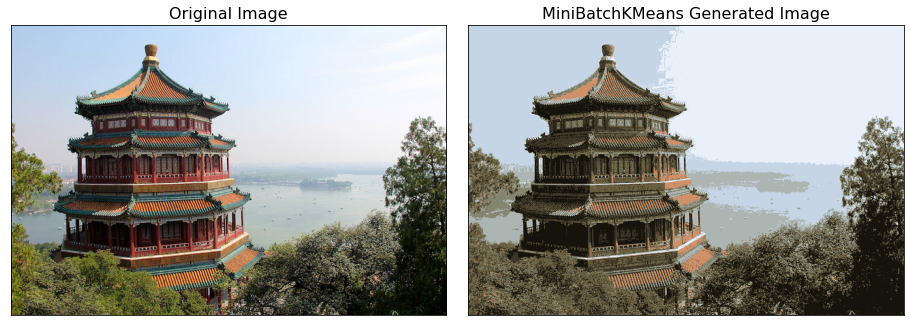

In [133]:
new_colors = centroids_2[model.predict(data_2)]

china_recolored = new_colors.reshape(427,640,3)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china_2)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('MiniBatchKMeans Generated Image', size=16);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


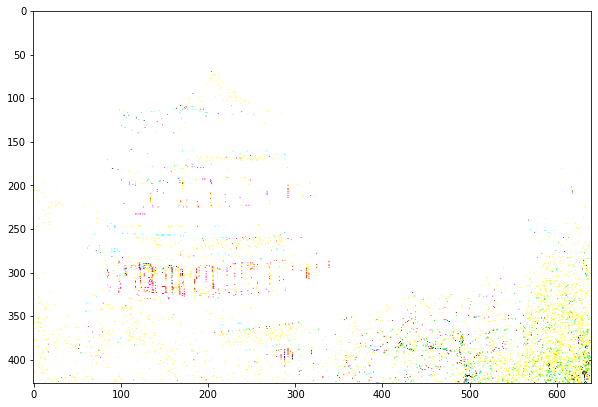

In [134]:
plt.figure(figsize = (10, 8))
plt.imshow(china_2 - china_recolored);

A seguir, foram renderizadas as imagens geradas pelo KMeans e pelo MiniBatchKMeans, a classe escolhida:

In [95]:
def render_images(model1, centroids1, model2, centroids2):

  new_colors1 = centroids1[model1.predict(data)]
  china_recolored1 = new_colors1.reshape(427,640,3)

  new_colors2 = centroids2[model2.predict(data)]
  china_recolored2 = new_colors2.reshape(427,640,3)
  
  fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(china_recolored1)
  ax[0].set_title('Imagem KMeans', size=16)
  ax[1].imshow(china_recolored2)
  ax[1].set_title('Imagem MiniBatchKMeans', size=16);

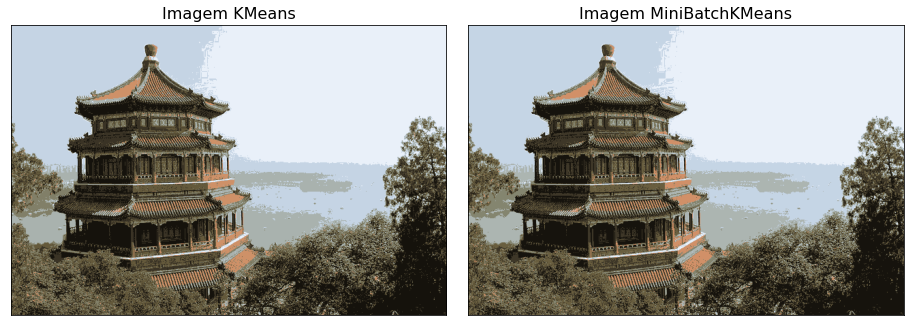

In [135]:
#Antes, executar a subseção "Exemplo 2:k-means para compressão de cores"
render_images(kmeans, centroids, model, centroids_2)

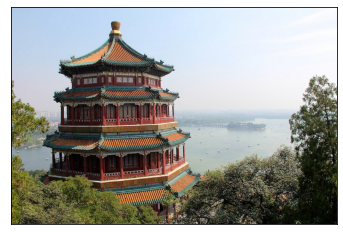

In [136]:
#Imagem original:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

Podemos observar que as imagens geradas pelo KMeans e pelo MiniBatchKMeans são bastante similares, dificultando a identificação de diferenças. No entanto, tanto a construção e folhagem presentes na imagem não utilizam os mesmos jogos de cores originais. 

Porém, se aumentarmos o valor de `n_clusters`, observaremos que KMeans foi relativamente melhor que o MiniBatchKMeans:

In [139]:
kmeans = KMeans(n_clusters=64).fit(data)
centroids = kmeans.cluster_centers_

model = MiniBatchKMeans(n_clusters=64).fit(data_2)
centroids_2 = model.cluster_centers_

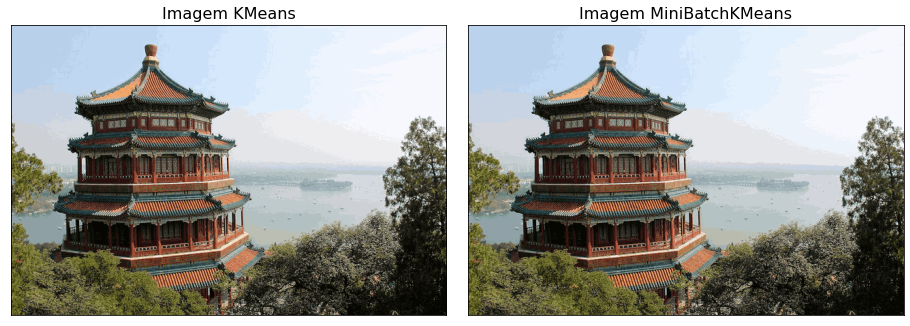

In [140]:
render_images(kmeans, centroids, model, centroids_2)

A principal diferença se encontra nos elementos no fundo da imagem: o céu, o corpo de água e o horizonte. No KMeans, a transição de uma cor semelhante para outra é menos súbita que no MiniBatchKMeans. 